In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Zadanie 1

__Algorytm K-średnich__

__Odczytanie danych__ - plik data_2d

In [2]:
df_data_2D= pd.read_csv("data/data_2d.csv")
print(df_data_2D)

     0.000000000000000000e+00  -7.687164597386728637e-01  \
0                         0.0                   2.687848   
1                         0.0                  -0.201379   
2                         0.0                   0.608496   
3                         0.0                  -0.082282   
4                         0.0                   2.083069   
..                        ...                        ...   
194                       1.0                   0.629144   
195                       1.0                  -0.723824   
196                       1.0                   1.346107   
197                       1.0                   3.608219   
198                       1.0                   3.764228   

     4.608603078297135447e-01  
0                    2.366961  
1                    0.470430  
2                    1.225400  
3                    1.137218  
4                    2.694482  
..                        ...  
194                  4.378584  
195                  5.

__Odczytanie danych__ - plik mnist

In [3]:
df_mnist= pd.read_csv("data/mnist.csv")
print(df_mnist)

     7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0    2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1    1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2    0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3    4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4    1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
..  .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
494  8  0    0    0    0    0    0    0    0    0  ...      0      0      0   
495  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
496  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
497  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
498  6  0    0    0    0    0    0    0    0    0  ...      0      0      0   

     0.661  0.662  0.663  0.664  0.665  0.666  0.66

__Zastosowanie K-średnich__

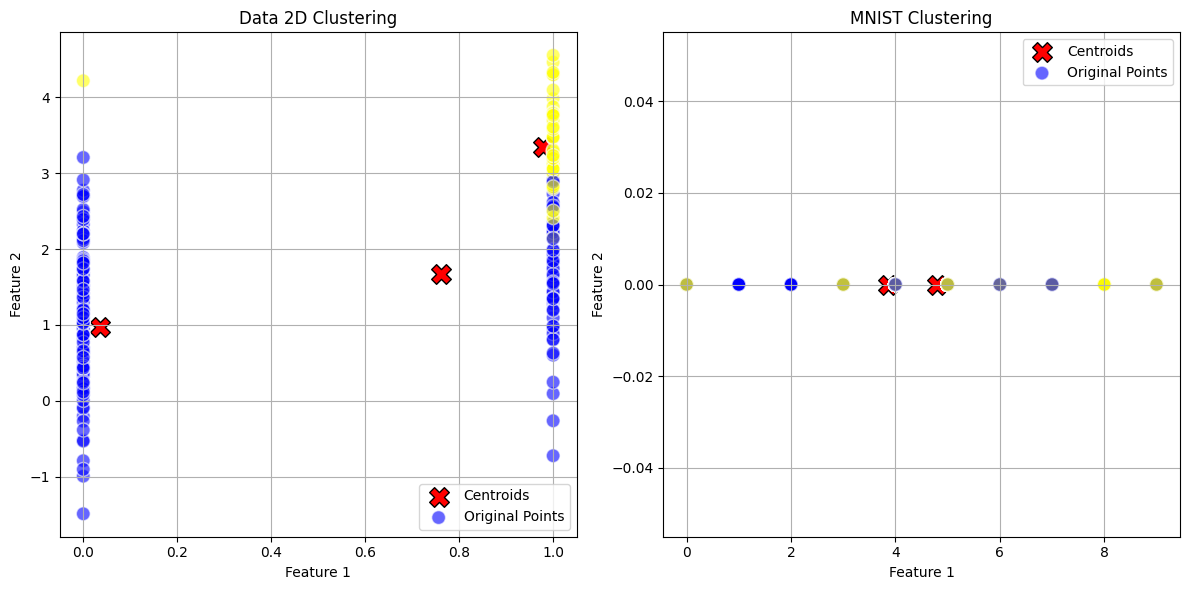

In [6]:
X_data_2D = df_data_2D.values
X_mnist = df_mnist.values

def print_k_means_for_2d_data(X, labels, centroids, new_points=None, ax=None):
    if ax is None:
        ax = plt.gca()
    
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', marker='X', s=200, edgecolors='k')
    colors = ['yellow' if label == 0 else 'blue' for label in labels]
    ax.scatter(X[:, 0], X[:, 1], c=colors, label='Original Points', alpha=0.6, edgecolors='w', s=100)
    if new_points is not None:
        new_colors = ['yellow' if label == 0 else 'blue' for label in new_labels]
        ax.scatter(new_points[:, 0], new_points[:, 1], c=new_colors, label='New Points', marker='s', s=150, edgecolors='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('KMeans Clustering Visualization')
    ax.legend()
    ax.grid(True)

kmeans1 = KMeans(n_clusters=3, random_state=0)
kmeans1.fit(X_data_2D)
labels1 = kmeans1.labels_
centroids1 = kmeans1.cluster_centers_

kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(X_mnist)
labels2 = kmeans2.labels_
centroids2 = kmeans2.cluster_centers_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
print_k_means_for_2d_data(X_data_2D, labels1, centroids1, ax=ax1)
ax1.set_title('Data 2D Clustering')
print_k_means_for_2d_data(X_mnist, labels2, centroids2, ax=ax2)
ax2.set_title('MNIST Clustering')
plt.tight_layout()
plt.show()


__Metoda łokciowa__

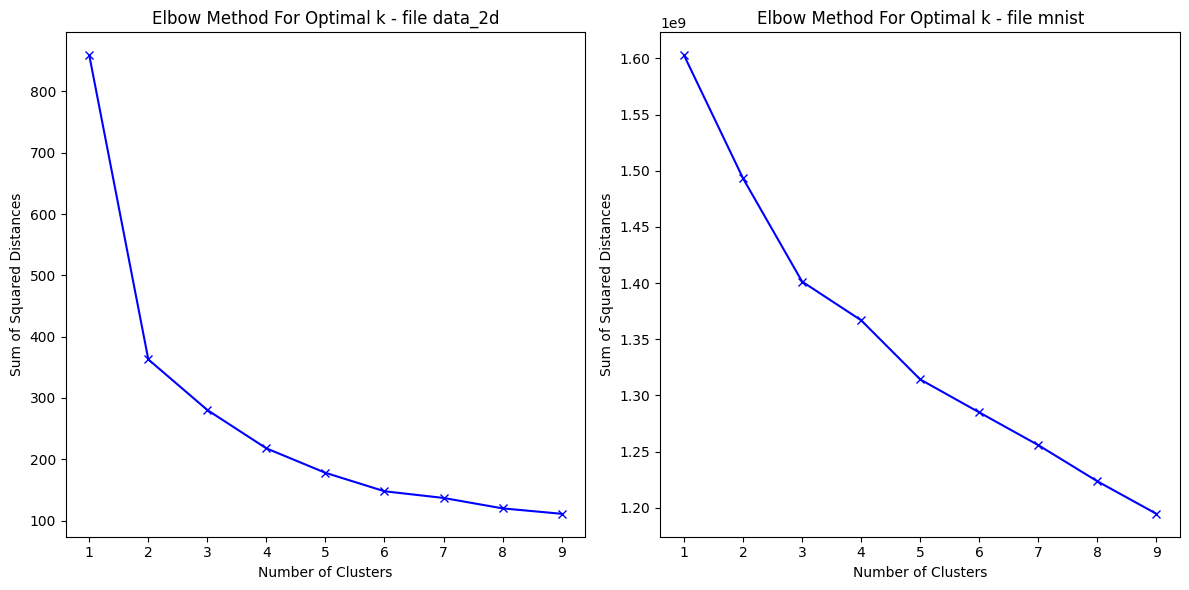

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sum_of_squared_distances = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_data_2D)
    sum_of_squared_distances.append(kmeans.inertia_)

ax1.plot(K_range, sum_of_squared_distances, 'bx-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of Squared Distances')
ax1.set_title('Elbow Method For Optimal k - file data_2d')

sum_of_squared_distances = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_mnist)
    sum_of_squared_distances.append(kmeans.inertia_)
    
ax2.plot(K_range, sum_of_squared_distances, 'bx-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Sum of Squared Distances')
ax2.set_title('Elbow Method For Optimal k - file mnist')

plt.tight_layout()
plt.show()

# Zadanie 2